In my last notebook [Learn Statistics - Beginners Basics](https://www.kaggle.com/tinasoni/learn-statistics-beginners-basics), I shared about my learning on how we can describe data using Descriptive statistics.

Now we know Data science is not about describing the data, but making inferences or predictions through data.

Let's start this journey through an example and coding is done using python.

# Learn by Example - Company ABC

Mr.CEO started company ABC in year 1821. And every year, either it has profit or loss. At the end of every year, he maintains the record of the profit or loss made by the company. So, he is having this data till this year 2020.

Now Mr.CEO contacted Mr.Analyst to see if he can do anything with the data he recorded to make business decision.

# Mr.CEO knows about "Population"

*Mr.CEO* - I have one csv file where I recorded the profit or loss made by company in thousands, at the end of every year. Even recorded it for this year till this month. But now I am planning to close this company due to covid situation.

*Mr.Analyst* - Cool. So if you close this company, this is the overall data available of your company. So we can call this as **Population**.

*Mr.CEO* - Wait. What do you mean by Population?

*Mr.Analyst* - [Population](https://en.wikipedia.org/wiki/Statistical_population) means all possible collection of records in a dataset . As you going to close company, there will be neither loss nor profit in future, so no possibility of getting new record in this dataset.

*Mr.CEO* - OK. I got it. So, now I want to understand how was my company performance till now. How can I know it?

*Mr.Analyst* - One way to start is, lets plot the histogram of Profit/loss made by company till now. Let me do that for you. Do you have that file with you?

*Mr.CEO* - Yes. Its shared as [CompanyABCProfit.csv](https://www.kaggle.com/tinasoni/normal-distribution-data?select=CompanyABCProfit.csv) in kaggle dataset. Also, added in input folder of this notebook.

*Mr.Analyst* - Great! So, let me read the file and plot histogram for you.

In [ ]:
import pandas as pd

# Read the CSV file.
data = pd.read_csv('../input/normal-distribution-data/CompanyABCProfit.csv')

# Plot Histogram using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set();
plt.figure(figsize=(12,6))
sns.distplot(data['Profit(Rs \'000)'], bins=12, )


# Mr.CEO understands "Normal Distribution"

*Mr.CEO* - Hey, what is this shape? and if I am not wrong, it looks like bell shaped, right?

*Mr.Analyst* - Yes. It is in bell-shaped. And such distrubtion of data is called **Normal Distribution**.

*Mr.CEO* - What do you mean by Normal Disbtribution?

*Mr.Analyst* - When mean, median and mode, all are same of given dataset, then such data distribution is called [Normal Distrubtion](https://en.wikipedia.org/wiki/Normal_distribution). The center value of curve is mean value, and 50% of values are less than the mean and 50% greater than the mean. And it is denoted as X ~ N(μ,σ2). In our case, ***Profit ~ N(1022,236910)***

*Mr.CEO* - Now what all these values you are talking about?

*Mr.Analyst* - When these values are calculated for Population, these are called **Population Parameters**. Let me calculate them for you, and show all the population parameters for Profit dataset.

In [ ]:
import numpy as np
from scipy import stats

print("Mean (μ): %4.f"%np.mean(data['Profit(Rs \'000)']))
print("Median : %4.f"%np.median(data['Profit(Rs \'000)']))
print("Mode : %4.f"%(stats.mode(data['Profit(Rs \'000)'])[0][0]))

print("Standard Deviation (σ) : %3.f"%np.std(data['Profit(Rs \'000)']))
print("Variance (σ2) : %3.f"%np.std(data['Profit(Rs \'000)'])**2)


# Mr.CEO understands "Z-score" or "Standard Score"

*Mr.CEO* - But the above numbers are not equal right?

*Mr.Analyst* - In real time, we should consider it if its approximately equal. And we can see that there is not much difference in the values of Mean, median and mode.

*Mr.CEO* - Ok. I agree. They are approximately equal But what about standard deviation?

*Mr.Analyst* - It means that on average, the company profit was Rs.1,022,000, and there is deviation in factor of Rs.487,000 in profits w.r.t to its average value.

*Mr.CEO* - This is very confusing.

*Mr.Analyst* - Don't worry. We can standarize this data using **Z-Score**.

*Mr.CEO* - Now, what is Z-Score?

*Mr.Analyst* - [Z-Score](https://en.wikipedia.org/wiki/Standard_score) is standard way of understanding how far any given value is from its average. And, its calcuated as ***z = (x – μ) / σ***. Also called as **Standard Score**. And this conversion of original value to its Z-score values is called **Standarizing or Normalising** the data. Lets convert profit data into its Z-score and plot it. 


In [ ]:
sns.set();
plt.figure(figsize=(12,6))
data['Standard Profit'] = stats.zscore(data['Profit(Rs \'000)'])
sns.distplot(data['Standard Profit'], bins=12, norm_hist=True)

# Mr.CEO understands "Z-distribution" or "Standard Normal Distribution"

*Mr.CEO* - Hey, what happen to values? and why the mean is equal to Zero?

*Mr.Analyst* - When we convert the values to its Z-scores, the mean of it will be Zero. Also, the standard deviation will become one. And the above plot is called **Z-distribution**.

*Mr.CEO* - Again you used some big word. What is Z-distribution?

*Mr.Analyst* - Its simple. **Z-distribution** is a normal distribution with mean zero and standard deviation 1. Hence, It is also called as **Standard Normal Distribution**. And denoted as ***X~N(0,1)***.

# Mr.CEO understands "Use of Z-Score"

*Mr.CEO* - Big Question. Why are we doing this?

*Mr.Analyst* - Firstly, can you compare the previous plot to this standard plot, and see how simple it is to understand. It clearly stating that, the values having z-score less than zero, are values which are lower than the average value, and vice-versa.

*Mr.CEO* - Agree. In compare, its simple to understand. I just have to convert any year profit value to its z-score, and I will get to know if I made more profit than average, or tending towards loss.

*Mr.Analyst* - Its not limited to this, but also tells you the probability of it happening.

*Mr.CEO* - Very Interesting. Can you explain?

*Mr.Analyst* - Using [Z-table](http://www.z-table.com/), we can do this. It will tell you probability of any Z-score value. Let see what is the probability of profit of year 1991. 

In [ ]:
profit = data[data['Year'] ==1991]['Profit(Rs \'000)']
z_score = data[data['Year'] ==1991]['Standard Profit']
prob = stats.norm.cdf(z_score)

print("Profit in 1991 : %d"%profit)
print("Z-Score : %2.2f"%z_score)

print("Probability using Z-score : %d"%(prob*100))

# Mr.CEO understands "Confidence Interval(CI)"

*Mr.CEO* - Wow. So you are saying there was 13% chance of getting a profit of Rs.476,000 in year 1991, which is also lower than average value.

*Mr.Analyst* - Yeah. This was applicable in case of estimation. But in current case, we can say that, your company earned more profit than year 1991, almost 77% of times, and same way, it has loss when compare to profit of year 1991, almost 12% of times.

*Mr.CEO* - Interesting. But what will it mean in case of estimation?

*Mr.Analyst* - In case of estimation, when we estimate the profit, its better to not rely on single estimated value but calculate **Confidence Interval** of it, for given confidence interval.

*Mr.CEO* - What do you mean? Can you explain more?
 
*Mr.Analyst* - [Confidence Interval (CI)](https://en.wikipedia.org/wiki/Confidence_interval) is the range calcuated using predicted value (ŷ), so that we will be sure that our acutal value will be within the range for given confidence interval or probability. Calculate as [ŷ-(z *  σ/√N), ŷ+(z *  σ/√N)], where N is total values in population dataset.

*Mr.CEO* - Bit Technical. Can you explain in simple terms?

*Mr.Analyst* - Sure. Lets say, if you estimated or predicted the profit of 2021 year by using any algorithm, and then it predicted it to be Rs.587,000. Then instead of directly relying on this value, we want to know the range and will be more confident on it. Lets say, you want to be sure that 95% of time the actual profit will be within the confidence interval calculated using this value. Let me calculate it.


In [ ]:
sigma = np.std(data['Profit(Rs \'000)'])
N = len(data['Profit(Rs \'000)'])
Z = stats.norm.ppf(.975)
profit_predicted = 587

lower_limit = profit_predicted - Z*(sigma/np.sqrt(N))
upper_limit = profit_predicted + Z*(sigma/np.sqrt(N))

print("Confidence Interval is [%d, %d]"%(lower_limit,upper_limit))

# Mr.CEO understands "Z-Critical" Value

*Mr.Analyst* - So, now we can say that there is 95% chance that, the actual profit in 2021 will be between Rs.519,000 and Rs.654,000.

*Mr.CEO* - Can't I increase or decrease my confidence level or chance value. I want to be more confident and find out the confidence interval for 99% confidence level? Will it be possible?

*Mr.Analyst* - Wow. You are talking as Statistician. And yes, we can increase or decrease our confidence level. And there are Z-score for each of those confidence level, and its referred as **Z-Critical** Values. Let me show you some of the frequently used confidence levels and its corresponding **Z-Critical** values.

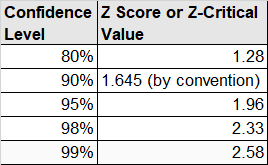

# Mr.CEO "hires" Mr.Analyst

*Mr.CEO* - When I have you to predict the profit in advance, and help me in improving my business. Now, how can I close my company?
Instead, I am hiring you!!!

*Mr.Analyst* - Then our prediction won't work like this. We have to understand **Sample** and **T-test**.

*Mr.CEO* - Phew. Here awaits another long discussion.

*Mr.Analyst* - Hehe. Lets schedule another meeting to continue this discussion. I guess you have enough for the day. :)

# Lets wait for Another meeting

Hope, you too learned from this discussion. 

Feel free to comment or correct the things.

See you again. :)


# Typo Mistakes?
Please help in correcting them ;)